# ONLINE FRAUD DETECTION

Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

--------------------------------------------------------------------

### Loading The Dataset

In [2]:
df=pd.read_csv('onlinefraud.csv')

isFlaggedFraud: This represents the current, simple, rule-based system the business uses to try and catch fraud. This rule is extremely basic: "If a transfer is over 200,000, flag it."

I will delete this column

In [3]:
df.drop(columns=['isFlaggedFraud'], inplace=True)

------------

Shape of the dataFrame:

There are 63 lakhs rows in this dataset.
There are 11 columns in this dataset.

In [4]:
df.shape

(6362620, 10)

----------------------------------

In [5]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


---------------------

## Renaming the Columns

I find these column names difficult so  I will change the name of the few columns

for Example:

steps->elapsed_hours

nameOrig->sender_id

oldbalanceOrg->sender_old_balance

newbalanceOrig->sender_new_balance

nameDest->recipient_id

oldbalanceDest->recipient_old_balance

newbalanceDest->recipient_new_balance


In [6]:
rename_map = {
    'step': 'elapsed_hours',
    'type': 'type',
    'amount': 'amount',
    'nameOrig': 'sender_id',
    'oldbalanceOrg': 'sender_old_balance',
    'newbalanceOrig': 'sender_new_balance',
    'nameDest': 'recipient_id',
    'oldbalanceDest': 'recipient_old_balance',
    'newbalanceDest': 'recipient_new_balance',
    'isFraud': 'isFraud'
}
df.rename(columns=rename_map, inplace=True)

Checking whether the data types of the values of all the columns are correct

In [7]:
df.head()

,elapsed_hours,type,amount,sender_id,sender_old_balance,sender_new_balance,recipient_id,recipient_old_balance,recipient_new_balance,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [8]:
df

,elapsed_hours,type,amount,sender_id,sender_old_balance,sender_new_balance,recipient_id,recipient_old_balance,recipient_new_balance,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [9]:
df.duplicated().sum()

np.int64(0)

There are no duplicated rows

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   elapsed_hours          int64  
 1   type                   object 
 2   amount                 float64
 3   sender_id              object 
 4   sender_old_balance     float64
 5   sender_new_balance     float64
 6   recipient_id           object 
 7   recipient_old_balance  float64
 8   recipient_new_balance  float64
 9   isFraud                int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


All the data types are correct.


If we did not have the correct data type then we would have done this:

**df[<span style="color: lightblue">'column_name'</span>].<span style="color: lightgreen">astype</span>(<span style="color: #fc8686">required_data_type</span>)**

---------------------------------------------------------------------------------------------------------------------------------

Taking the description of each column in the data set

In [36]:
df.dtypes

elapsed_hours              int64
type                      object
amount                   float64
sender_id                 object
sender_old_balance       float64
sender_new_balance       float64
recipient_id              object
recipient_old_balance    float64
recipient_new_balance    float64
isFraud                    int64
dtype: object

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
elapsed_hours,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
sender_old_balance,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
sender_new_balance,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
recipient_old_balance,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
recipient_new_balance,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00


--------------------------

Checking for missing Values

In [12]:
df.isnull().sum()

elapsed_hours            0
type                     0
amount                   0
sender_id                0
sender_old_balance       0
sender_new_balance       0
recipient_id             0
recipient_old_balance    0
recipient_new_balance    0
isFraud                  0
dtype: int64

We found no missing values

-----------------------------------

We will check all thbalance should never be less than zero

In [37]:
(df[['sender_old_balance','sender_new_balance',
     'recipient_old_balance','recipient_new_balance']] < 0).sum()

sender_old_balance       0
sender_new_balance       0
recipient_old_balance    0
recipient_new_balance    0
dtype: int64

They do not negative balance. It is fine

-------------

##### Value Counts for Categorical Columns

Value Counts for type Column

In [13]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Value Counts for isFraud Column

In [14]:
vc=df['isFraud'].value_counts()
print(vc)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


Fraud distribution

In [15]:
(vc / len(df) * 100).round(6)

isFraud
0    99.870918
1     0.129082
Name: count, dtype: float64

We can say that the data in this is highly imbalanced. 

----------------

In [16]:
df.head()

,elapsed_hours,type,amount,sender_id,sender_old_balance,sender_new_balance,recipient_id,recipient_old_balance,recipient_new_balance,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [17]:
df.columns

Index(['elapsed_hours', 'type', 'amount', 'sender_id', 'sender_old_balance',
       'sender_new_balance', 'recipient_id', 'recipient_old_balance',
       'recipient_new_balance', 'isFraud'],
      dtype='object')

Separating the numerical and categorical

In [18]:
numeric_cols=['amount', 'sender_old_balance', 'sender_new_balance', 'recipient_old_balance', 'recipient_new_balance']

# Exploratory Data Analysis

## Univariate Analysis

-------------------------------

### Categorical

##### CountPlot

isFraud Column

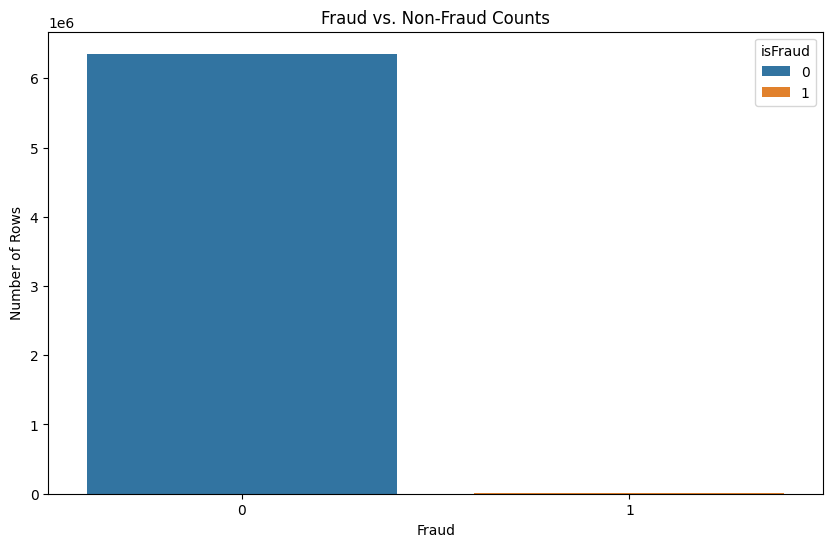

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', hue='isFraud', data=df)
plt.title('Fraud vs. Non-Fraud Counts')
plt.ylabel('Number of Rows')
plt.xlabel('Fraud')
plt.show()

In the top graph, we can see the dataset is highly imbalanced. For isFraud=1, the graph is ver small. It is not even visible. We add this **<span style="color: #57b0ff">plt.yscale('log')</span>** to make y-axis to have a logarithmic scale. By doing this, we are compressing the large values and expanding thee small values.

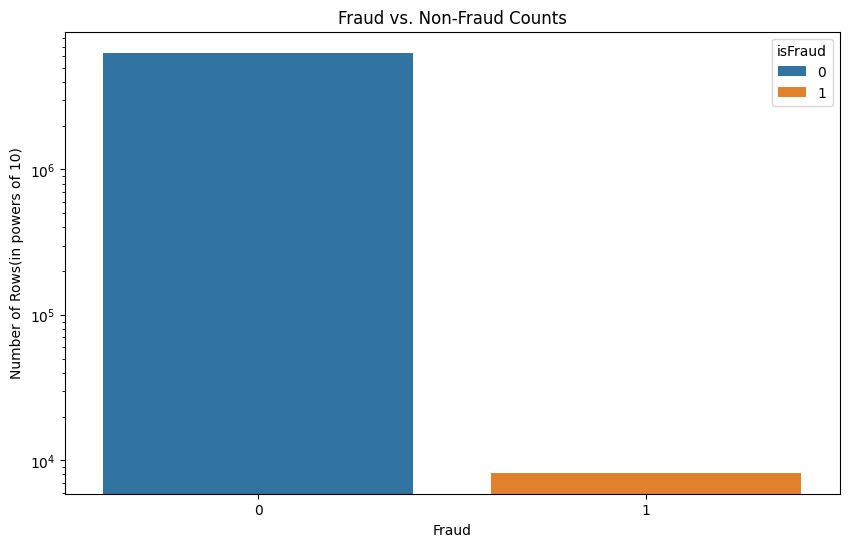

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', hue='isFraud', data=df)
plt.title('Fraud vs. Non-Fraud Counts')
plt.ylabel('Number of Rows(in powers of 10)')
plt.xlabel('Fraud')

plt.yscale('log')

plt.show()

Transaction Type Column:

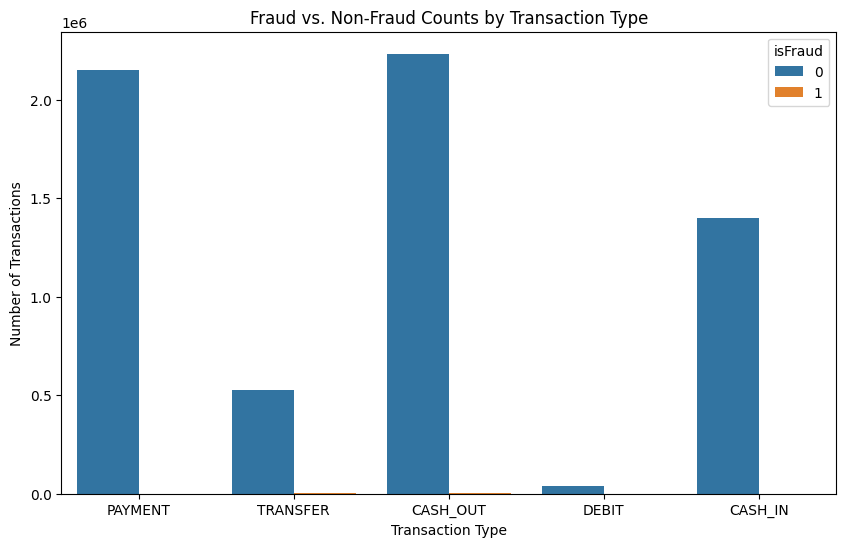

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraud vs. Non-Fraud Counts by Transaction Type')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')
plt.show()

In the top graph, we can see the dataset is highly imbalanced. For isFraud=1, the graph is ver small. It is not even visible. We add this **<span style="color: #57b0ff">plt.yscale('log')</span>** to make y-axis to have a logarithmic scale. By doing this, we are compressing the large values and expanding thee small values.

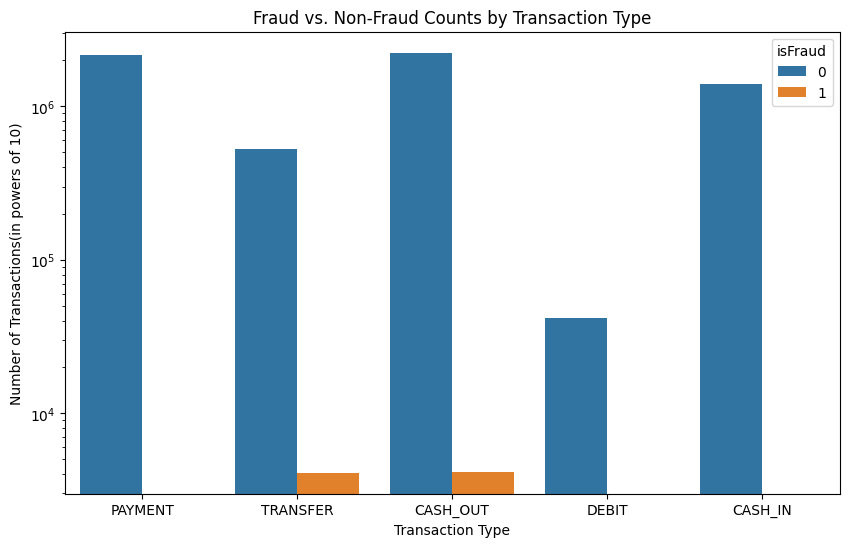

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraud vs. Non-Fraud Counts by Transaction Type')
plt.ylabel('Number of Transactions(in powers of 10)')
plt.xlabel('Transaction Type')

plt.yscale('log')

plt.show()

#### PieChart

Type Column

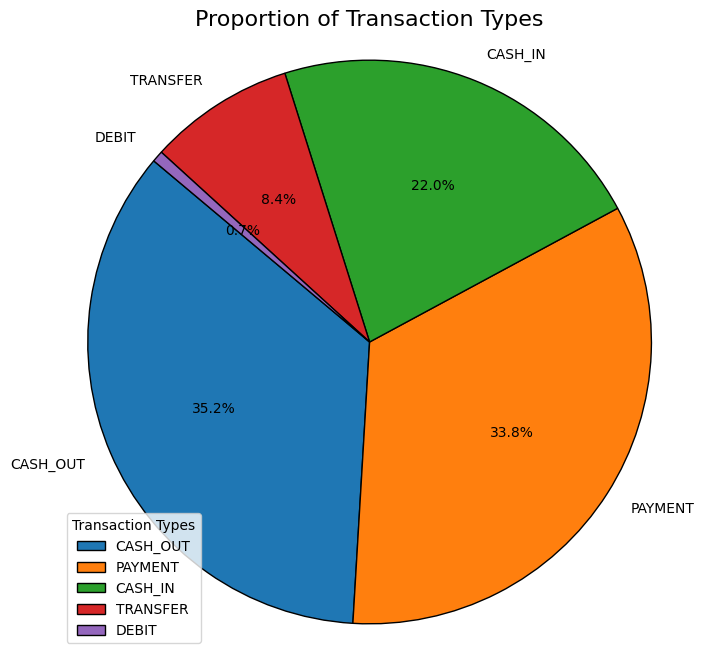

In [23]:
plt.figure(figsize=(8, 8))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Transaction Types', fontsize=16)
plt.legend(title="Transaction Types", loc="best")
plt.axis('equal')
plt.show()

isFraud Column

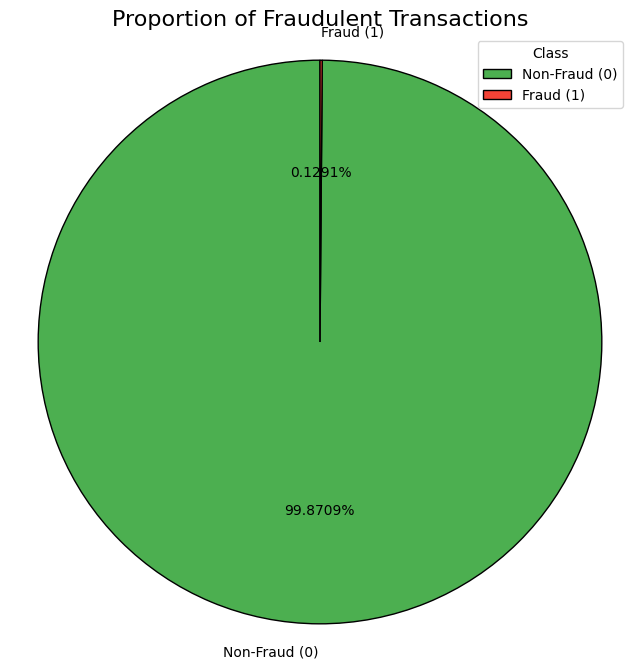

In [24]:
plt.figure(figsize=(8, 8))
fraud_counts = df['isFraud'].value_counts()
plt.pie(fraud_counts, labels=['Non-Fraud (0)', 'Fraud (1)'], autopct='%1.4f%%', 
        startangle=90, colors=['#4CAF50', '#F44336'], wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Fraudulent Transactions', fontsize=16)
plt.legend(title="Class", loc="best")
plt.axis('equal')
plt.show()

1. In our datset, there is only **0.1291%** of the data Fraud. It is so, less. A simple model which tells "Not Fraud" would be 99.87% accurate. We must find what makes this small 0.13% different from others.

2. From the countplot of **Fraud vs. Non-Fraud Counts by Transaction Type**, we can say that Fraud only occurs in *TRANSFER* and *CASH_OUT*. The other three transaction types have zero fraudulent cases. We have decreased our area of searching from 5 transaction types to 2.


-------------------

### Numerical 

In [25]:
display(df[numeric_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
sender_old_balance,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
sender_new_balance,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
recipient_old_balance,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
recipient_new_balance,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08


-------------------------

##### Histograms

In [26]:
for col in numeric_cols:
    print(col, df[col].value_counts()[0])

amount 16
sender_old_balance 2102449
sender_new_balance 3609566
recipient_old_balance 2704388
recipient_new_balance 2439433


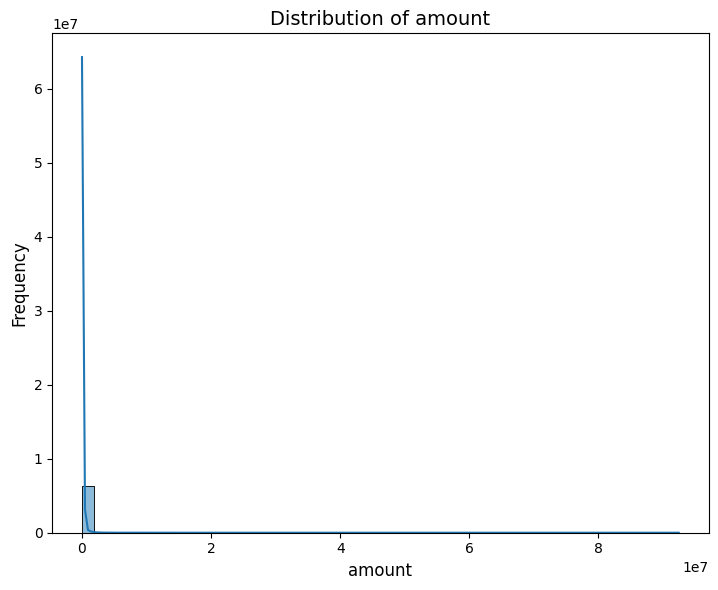

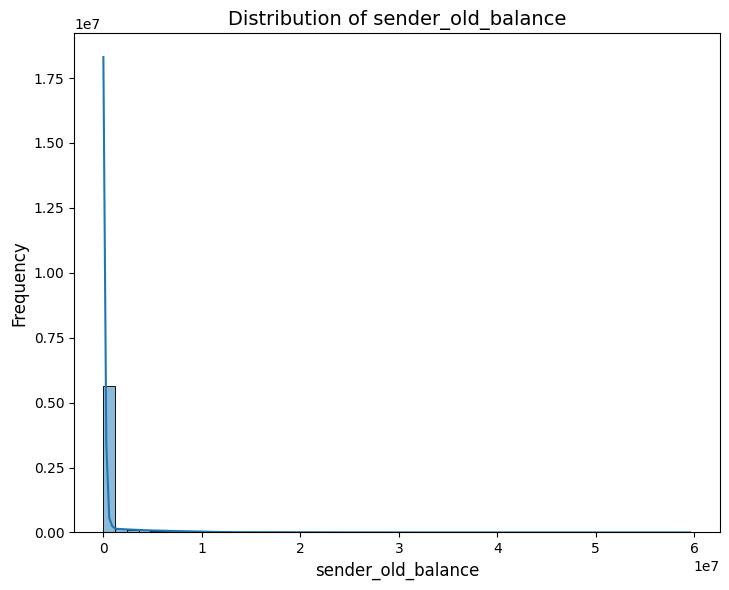

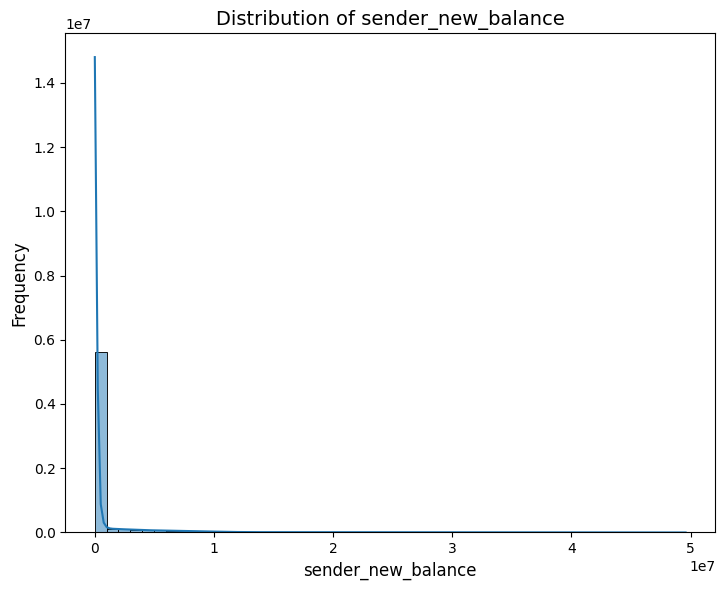

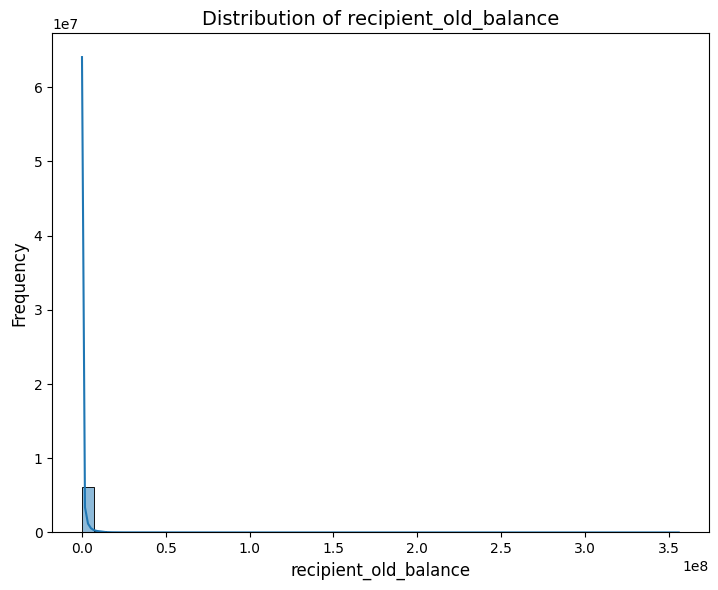

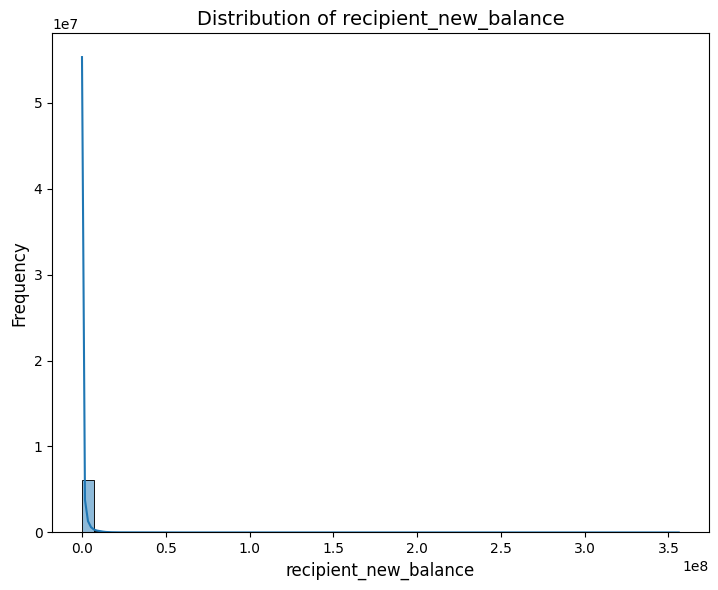

In [27]:
for col in numeric_cols:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

As you see in the above histograms, all the histograms are right skewed. We cannot draw much of the insight from this graphs. This  is happening because most transactions are small or medium, but there are a few enormous transactions. These enormous transactions stretch the x-axis so, the normal data gets squashed into one long bar which is unreadable.

There is a solution for this, we will use **<span style="color: #fcb186">np.log1p</span>**

**np.log1p(x)=log(1+x)**

It makes the large differnce between columns to a smaller difference.

We are using log1p and not log because: <br>
Many of our values are zero<br>
We  know that, <br>
log(0) is mathematically undefined.<br>
So, we use **<span style="color: #fcb186">np.log1p</span>**

Here log is of base **e** not 10

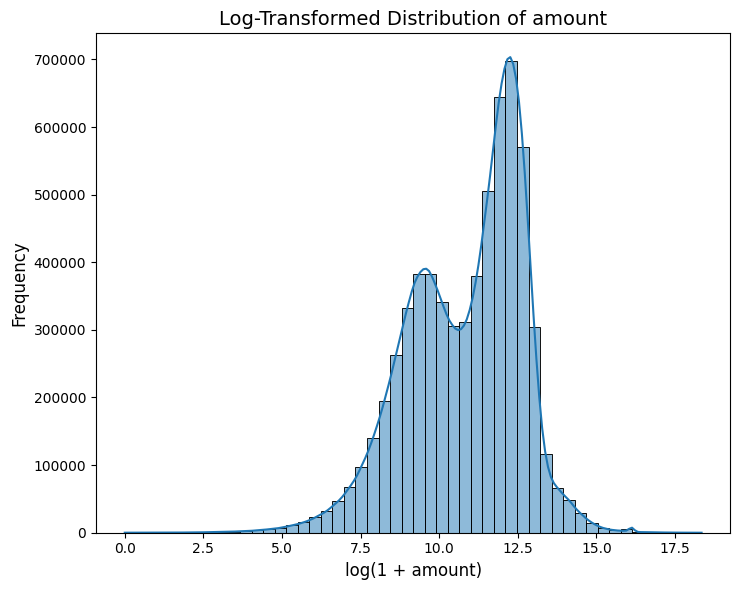

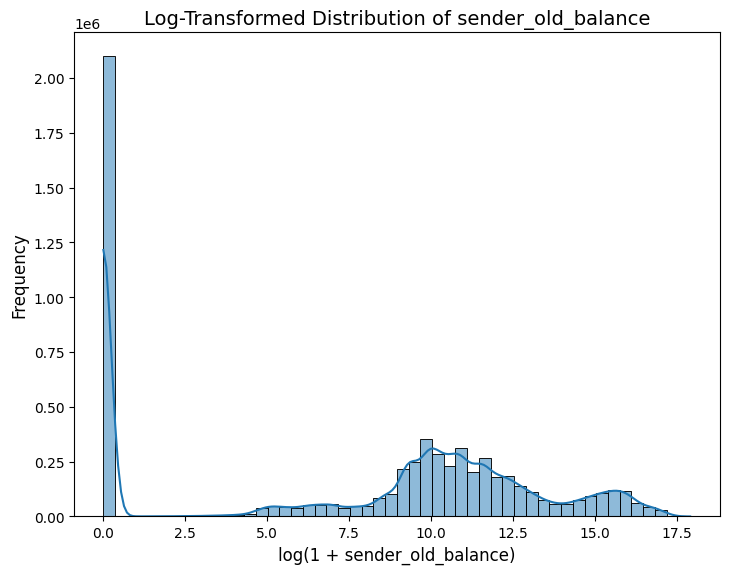

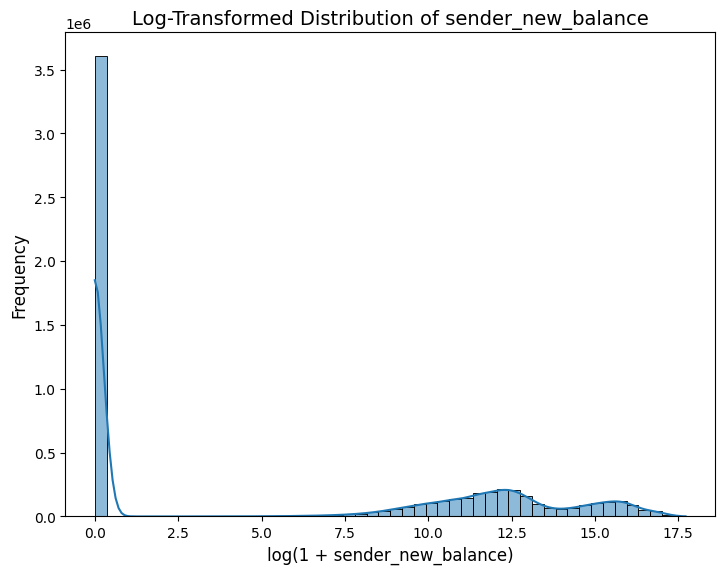

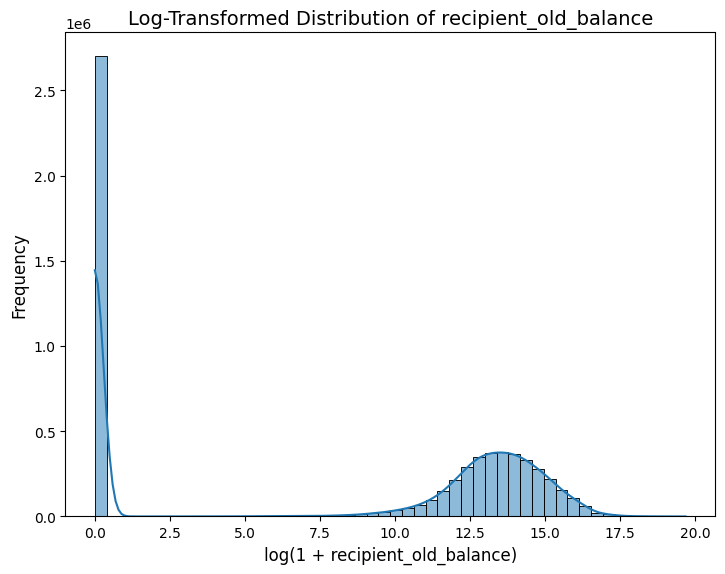

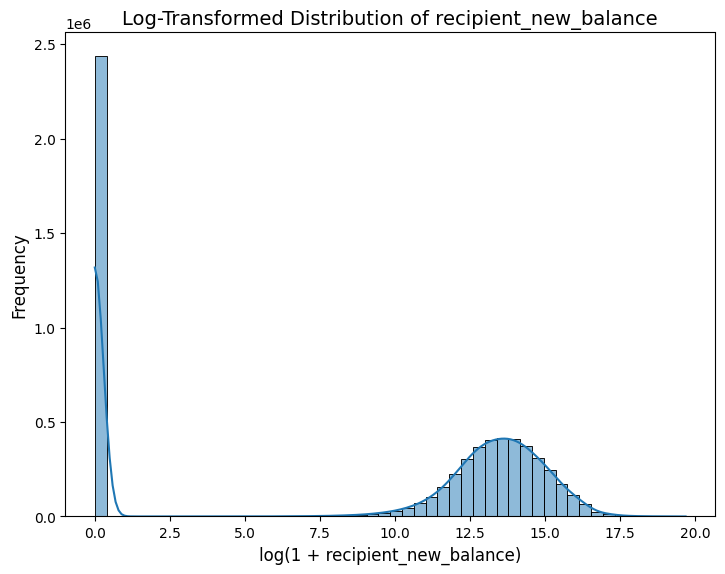

In [43]:
for col in numeric_cols:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    log_data = np.log1p(df[col])
    sns.histplot(log_data, bins=50, kde=True)
    plt.title(f'Log-Transformed Distribution of {col}', fontsize=14)
    plt.xlabel(f'log(1 + {col})', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'reports/graphs/histograms/histogram{col}.png', dpi=300)
    plt.show()

1. Amount: We see a bimodal distribution. The 2 peaks are the small one is at around log(x)=10 and the larger around log(x)=12.5. There might be two common groups of transactions. We will see more of connection between amount and transaction type in bivariate analysis.

2. Sender Old Balance: We have a major spike at 0 with more than 2 million entries and other separate distribution. As it is a synthetic dataset. That maybe the reason to have such a spike. As you can see, a sender cannot send money to anyone if he's bank balance is 0. This can be because it is a synthetic dataset. After the spike, we see a wide spread of values. 
We can say that:
- Many people keep the balance less.
- A smaller group of people have large balance.

3. Sender New Balance: This also shows the same behaviour as the old balance. But, the frequency is low. That is obvious, after the transaction sender's money is transeferred. So, the frequency is less.

4. Recipient Old Balance: This also shows a major spike at 0. For the people whose balance greater than zero it shows a clean and smooth curve.

5. Recipient New Balance: After receiving money, even then many people's balance still have a very small balance. The graph is neat and smooth after the spike.

----------------

#### Boxplot

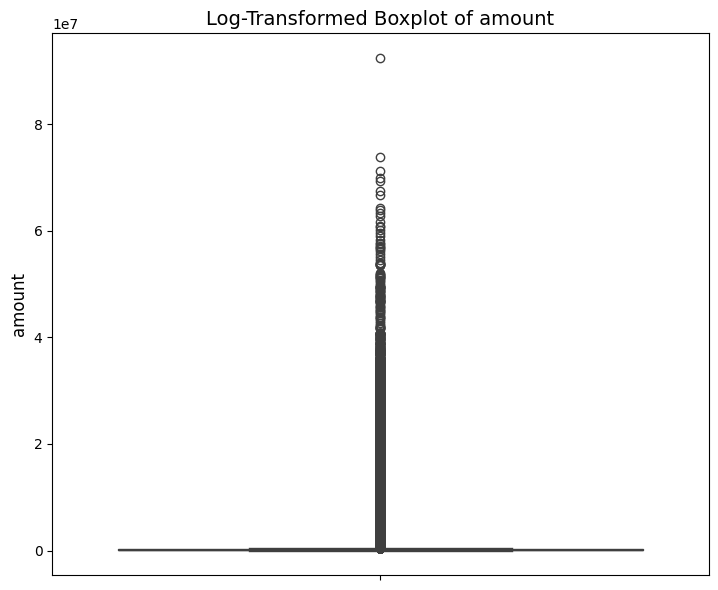

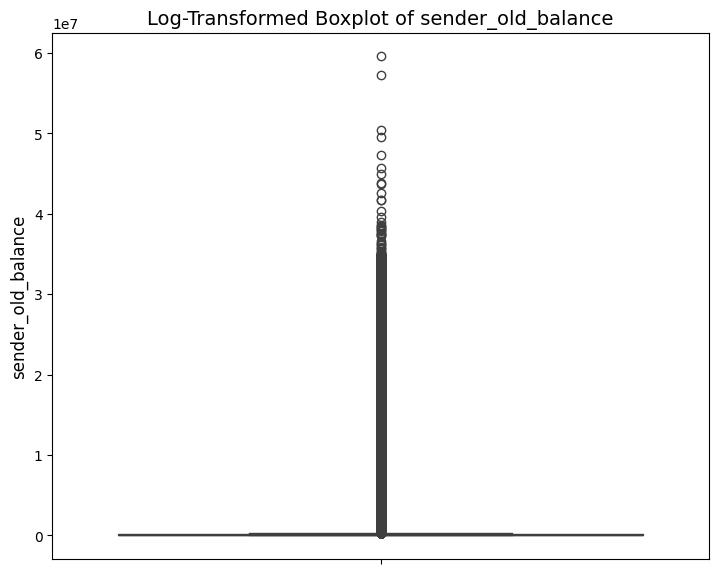

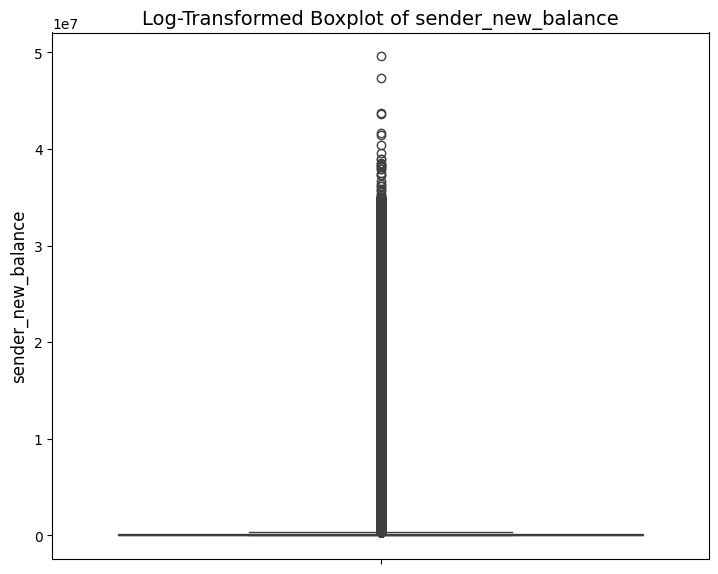

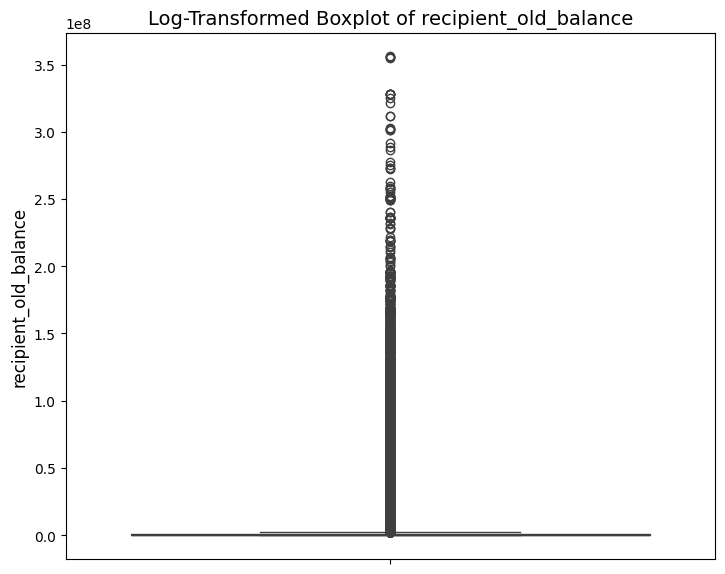

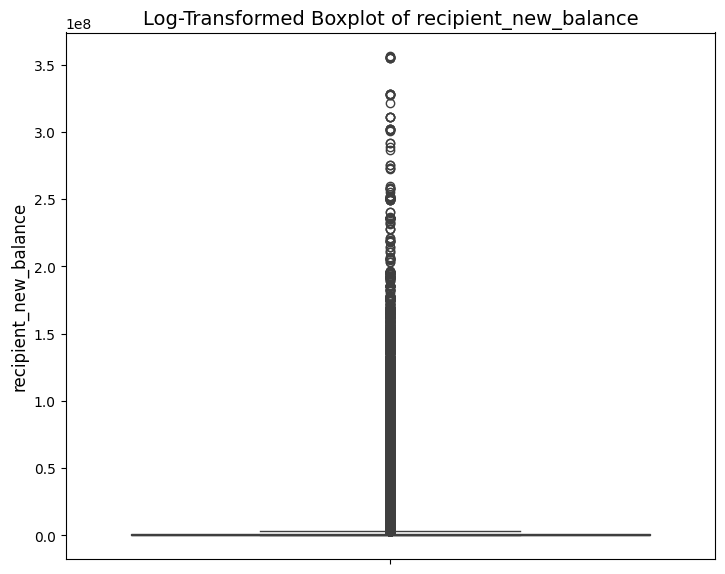

In [29]:
for col in numeric_cols:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Log-Transformed Boxplot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

Same reason as above to  use the log transformation

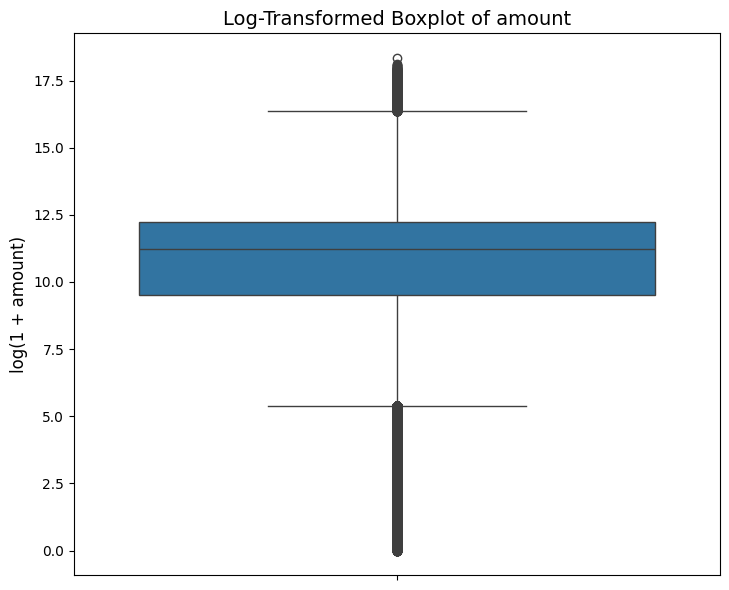

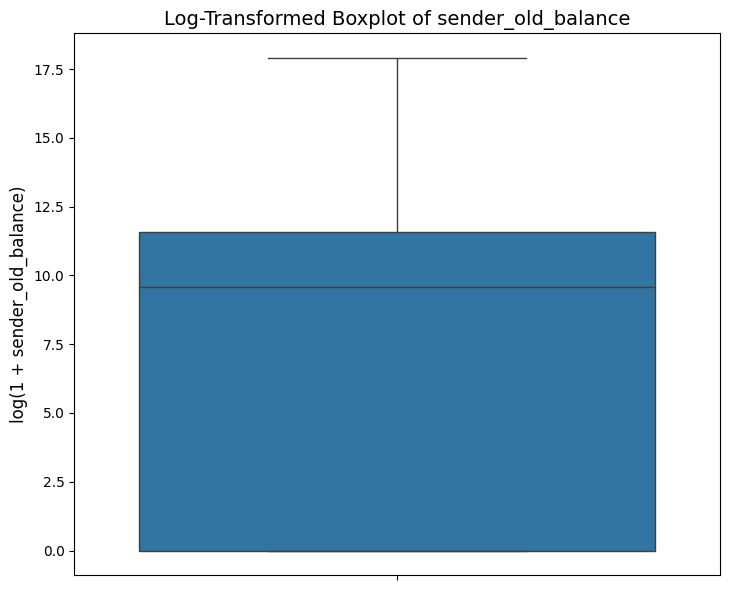

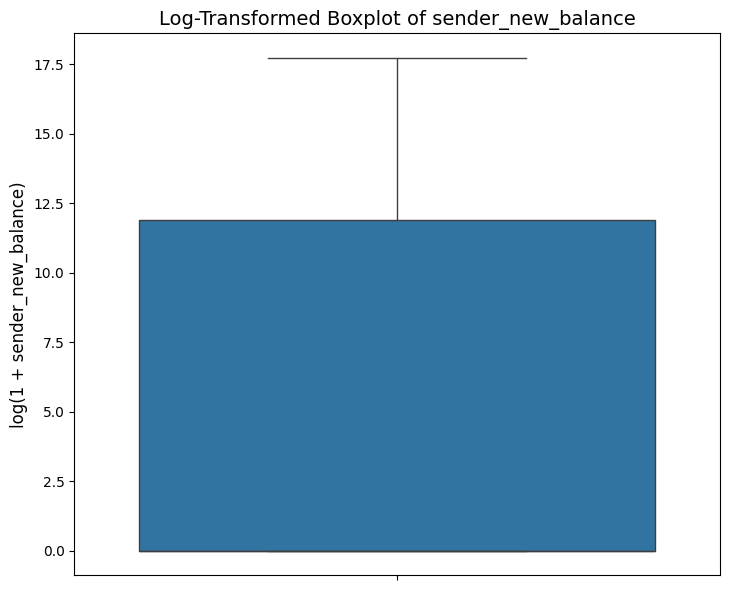

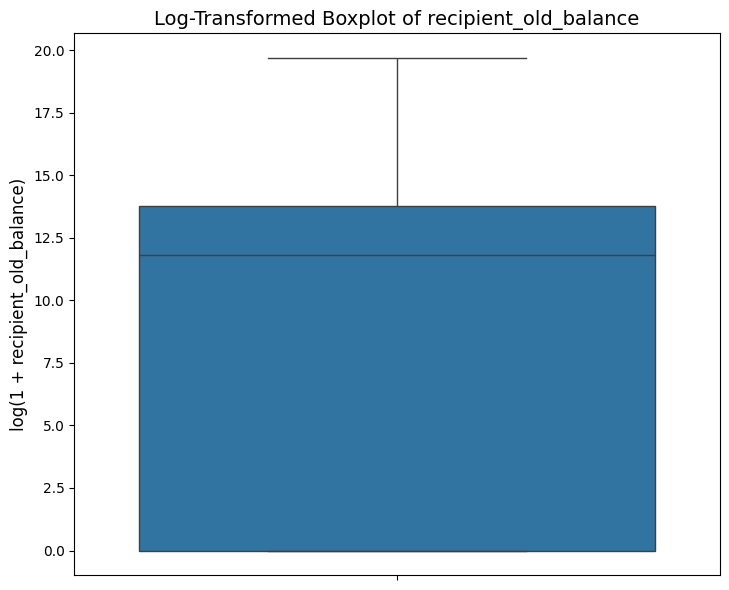

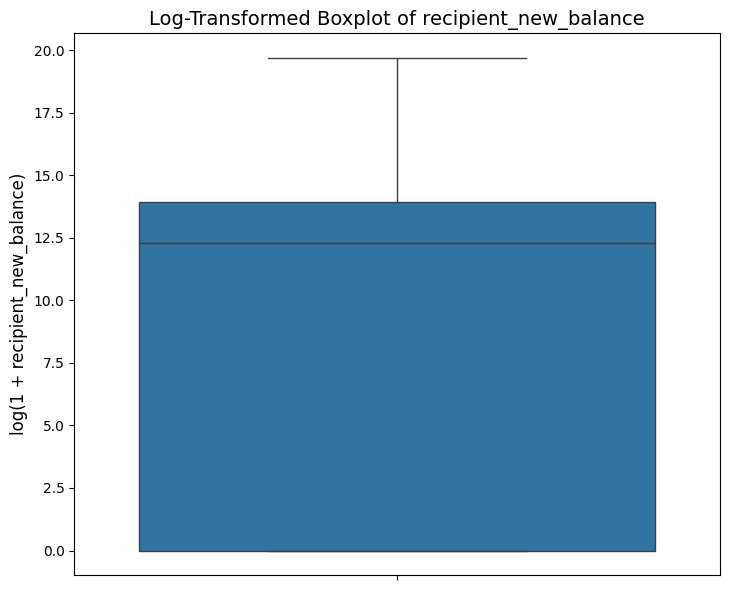

In [30]:
for col in numeric_cols:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 2)
    log_data = np.log1p(df[col])
    sns.boxplot(y=log_data)
    plt.title(f'Log-Transformed Boxplot of {col}', fontsize=14)
    plt.ylabel(f'log(1 + {col})', fontsize=12)
    plt.tight_layout()
    plt.show()

## Bivariate Analysis

##### Features vs isFraud

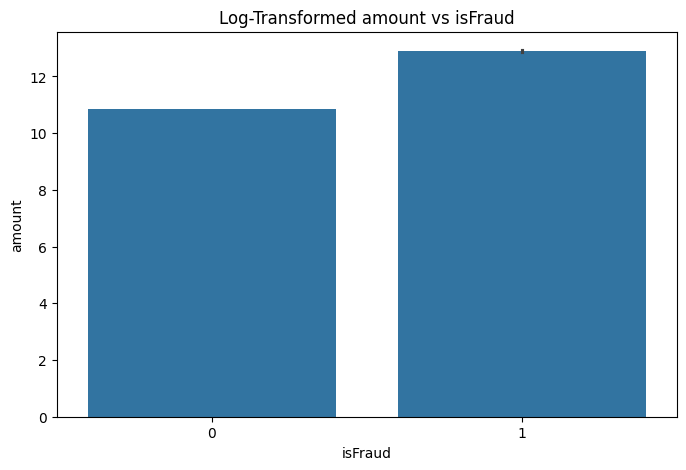

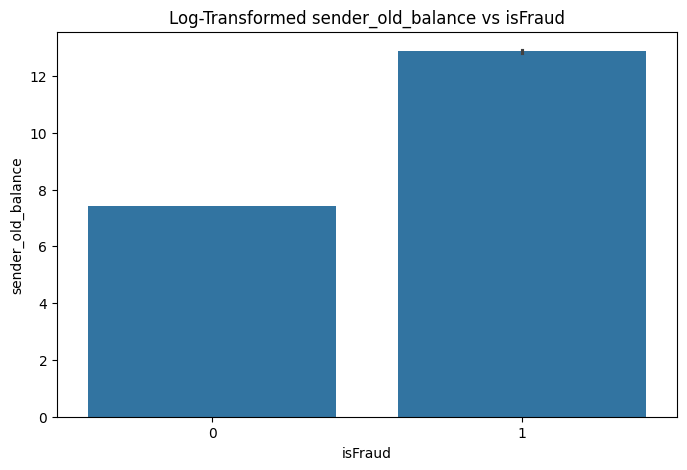

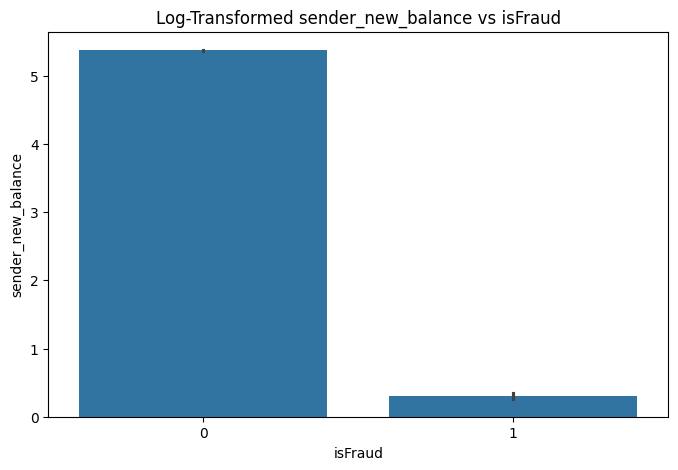

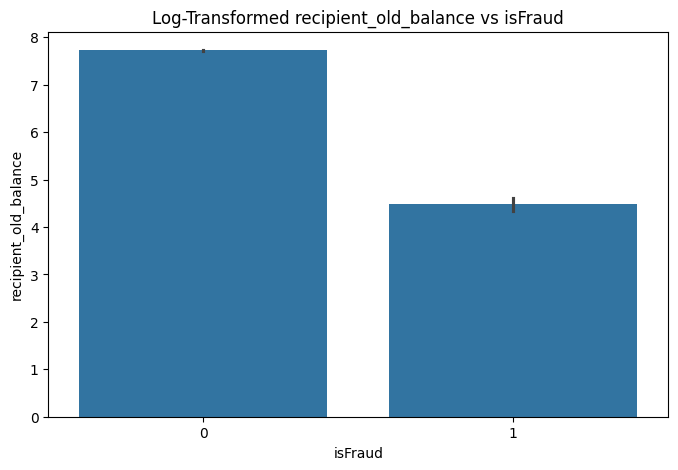

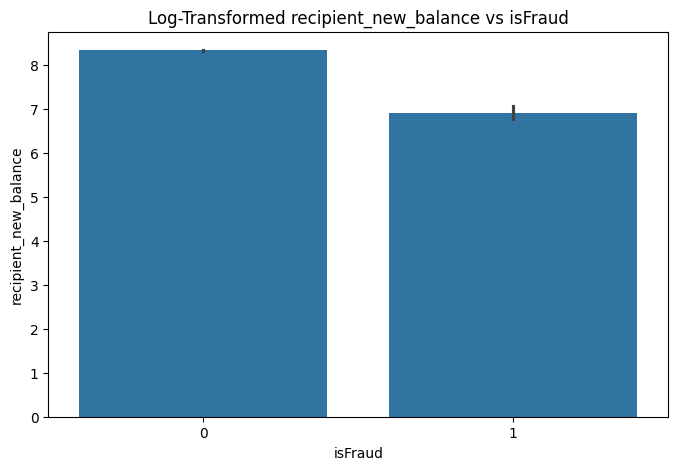

In [44]:
for col in numeric_cols:
    log_data=np.log1p(df[col])
    plt.figure(figsize=(8,5))
    sns.barplot(x=df['isFraud'], y=log_data)
    plt.title(f"Log-Transformed {col} vs isFraud")
    plt.show()


In [31]:
df.loc[:, 'isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [32]:
len(df.loc[df['sender_old_balance'] == 0.0])

2102449

In [33]:
df.loc[df['sender_old_balance'] == 0.0, 'type'].value_counts()

type
CASH_OUT    1025799
PAYMENT      774245
TRANSFER     282783
CASH_IN       13464
DEBIT          6158
Name: count, dtype: int64

In [34]:
df_sender_old_balance_zero=df.loc[df['sender_old_balance'] == 0.0]

pd.crosstab(df_sender_old_balance_zero['type'], df_sender_old_balance_zero['isFraud'])

isFraud,0,1
type,,
CASH_IN,13464,0
CASH_OUT,1025762,37
DEBIT,6158,0
PAYMENT,774245,0
TRANSFER,282779,4


In [35]:
count=0
# .str.startswith('M') returns a True/False for every row.
# .sum() then counts all the True values (since True=1, False=0).
count = df_sender_old_balance_zero['recipient_id'].str.startswith('M').sum()

print(count)

774245
